<a href="https://colab.research.google.com/github/syamsulrizal123/TA_Covid19/blob/main/template_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import matplotlib.pyplot as plt
import cv2

import numpy as np
import os

In [ ]:
import PIL.Image as pil_image
import io
path ='/content/drive/MyDrive/Selected Covidset/Normal'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    array=np.array(img)
    max_val=np.amax(array)
    normalized=(array/max_val)
    im = pil_image.fromarray(normalized)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/Normalized/normal/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/Normalized/normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/Normalized/normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

KeyboardInterrupt: ignored

In [ ]:
from skimage import io
from skimage.filters import gaussian
path ='/content/drive/MyDrive/Selected Covidset/Normal'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    gausfilter = gaussian(img, sigma=1, mode='constant', cval=0.0)
    im = Image.fromarray(gausfilter)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/gaussian/normal' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/gaussian/normal' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/gaussian/normal' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

In [ ]:
from skimage import exposure
path ='/content/drive/MyDrive/Normalized_data/normal'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    clahe = exposure.equalize_adapthist(img)
    im = Image.fromarray(clahe)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/normalized CLAHE/normal/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/normalized CLAHE/normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/normalized CLAHE/normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("CLAHE Success")

CLAHE Success


In [ ]:
from skimage import exposure
path ='/content/drive/MyDrive/Selected Covidset/Normal'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    clahe = exposure.equalize_adapthist(img)
    im = Image.fromarray(clahe)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/CLAHE/Normal/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/CLAHE/Normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/CLAHE/Normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("CLAHE Success")

CLAHE Success


In [4]:
print("[INFO] loading images...")
imagePaths = paths.list_images("normalized CLAHE") 
data = []
labels = []

[INFO] loading images...


In [5]:
width = 224
height = 224
dsize = (width, height)
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
    image = cv2.imread(imagePath,-1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = image.convert('L')
    image = cv2.resize(image,dsize)
    image = np.array(image)
    data.append(image)

  # extract the class label from the file path and update the
	# labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [6]:
import cv2

im = cv2.imread('/content/drive/MyDrive/normalized CLAHE/normal/IM00001.tif', -1)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


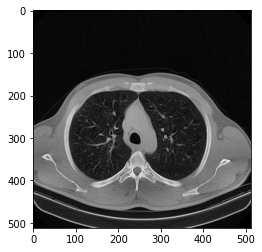

In [7]:
plt.imshow(im_rgb)


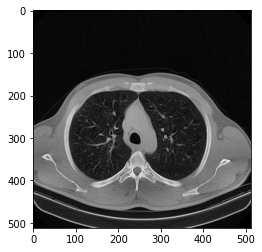

In [8]:
plt.imshow(im_rgb)
#covid

covid


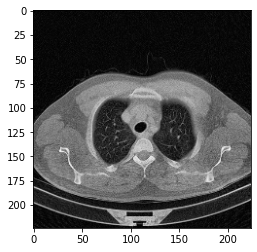

In [9]:

print(labels[0])
plt.imshow(data[0])

In [10]:
print(labels)

['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [12]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [13]:
data = np.array(data)
data.shape

(1000, 224, 224, 3)

In [14]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(750, 224, 224, 3)
(250, 224, 224, 3)
(750,)
(250,)


In [15]:
print(trainX[4])

[[[0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  ...
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]]

 [[0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  ...
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]]

 [[0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  ...
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]]

 ...

 [[0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  ...
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]]

 [[0.00633456 0.00633456 0.00633456]
  [0.00633456 0.00633456 0.00633456]


In [16]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [17]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_vgg16_1.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [20]:
from keras.optimizers import Adam, SGD, RMSprop

# train the model using the Adam optimizer
print("[INFO] training network...")
opt =opt = Adam(lr=1e-4, decay=1e-6)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
24/24 [==============================] - 94s 2s/step - loss: 0.6890 - accuracy: 0.5377 - val_loss: 0.5847 - val_accuracy: 0.6920

Epoch 00001: val_accuracy improved from -inf to 0.69200, saving model to best_weight_vgg16_1.h5
Epoch 2/50
24/24 [==============================] - 21s 879ms/step - loss: 0.5264 - accuracy: 0.7414 - val_loss: 0.3506 - val_accuracy: 0.8200

Epoch 00002: val_accuracy improved from 0.69200 to 0.82000, saving model to best_weight_vgg16_1.h5
Epoch 3/50
24/24 [==============================] - 21s 889ms/step - loss: 0.3086 - accuracy: 0.8459 - val_loss: 0.3160 - val_accuracy: 0.8480

Epoch 00003: val_accuracy improved from 0.82000 to 0.84800, saving model to best_weight_vgg16_1.h5
Epoch 4/50
24/24 [==============================] - 21s 889ms/step - loss: 0.1896 - accuracy: 0.9226 - val_loss: 0.1579 - val_accuracy: 0.9520

Epoch 00004: val_accuracy improved from 0.84800 to 0.95200, saving model to best_weight_vgg16_1.h5
Epoch 5/50
24/24 [================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


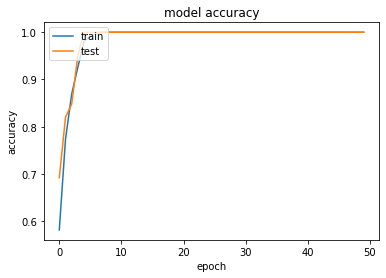

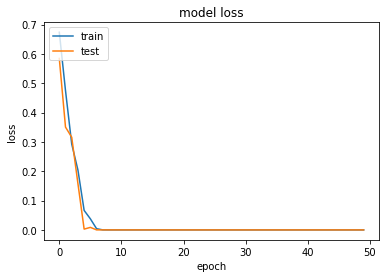

In [21]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict(testX, batch_size=32)


In [24]:
print(predictions.argmax(axis=1))


[1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1]


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [26]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = encoder.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00       121
      normal       1.00      1.00      1.00       129

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [27]:

cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[121   0]
 [  0 129]]


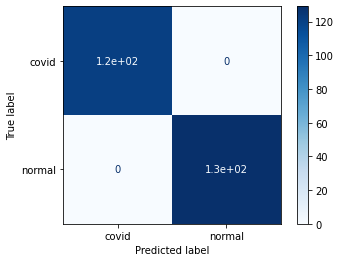

In [28]:

disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)